# NASA Asteroids Classification using KNN

## Aim
This project aims to analyze the NASA asteroids dataset and classify hazardous and non-hazardous asteroids based on strongly correlated parameters using a model based on the K-Nearest Neighbours algorithm. 

## Objectives
1. Perform basic exploratory analysis on the asteroids dataset to study various features and understand their relations
2. Isolate useful classification features from the dataset 
3. Clean, normalize and split dataset into train and test sets before processing
4. Train the KNN model and determine its accuracy
5. Determine optimal value of K and plot the results

## Dataset
NASA: Asteroids Classification https://www.kaggle.com/shrutimehta/nasa-asteroids-classification

## Methodology

### Import libraries

In [1]:
# imports
import os
from mpl_toolkits.mplot3d import Axes3D
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt #Data Visualization 
from sklearn import preprocessing

### Exploring the dataset

#### Import dataset

In [2]:
# read in the asteroids dataset csv file
df = pd.read_csv('./nasa.csv')
df.dataframeName = 'nasa.csv'

#### Explore features 

In [3]:
df.head(10)

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True
5,3671135,3671135,19.6,0.319562,0.714562,319.561887,714.562102,0.198566,0.444008,1048.431420,...,178.971951,556.160556,0.577800,198.145969,2.069265,2.458009e+06,354.237368,0.647295,J2000,False
6,2495323,2495323,19.6,0.319562,0.714562,319.561887,714.562102,0.198566,0.444008,1048.431420,...,178.971953,556.160544,0.577800,198.145960,2.069265,2.458009e+06,354.237396,0.647295,J2000,False
7,2153315,2153315,19.2,0.384198,0.859093,384.197891,859.092601,0.238729,0.533815,1260.491809,...,112.562984,502.808758,0.680905,288.374651,1.794045,2.458242e+06,186.776932,0.715978,J2000,False
8,2162463,2162463,17.8,0.732074,1.636967,732.073989,1636.967205,0.454890,1.017164,2401.817627,...,80.211132,447.837013,0.872705,353.422394,1.418397,2.458222e+06,182.236432,0.803864,J2000,False
9,2306383,2306383,21.5,0.133216,0.297879,133.215567,297.879063,0.082776,0.185093,437.058960,...,2.613682,299.535161,0.393040,253.765937,1.359211,2.457901e+06,119.861382,1.201862,J2000,True


##### ATTRIBUTES

- Neo Reference ID - Near Earth Object (NEO) reference ID number for an asteroid (or a comet) which comes close to earth
- Name - 'Name' of asteroid (same as NEO Reference ID)
- Absolute Magnitude - A measure of the asteroid's luminosity (in H) (the brightness of an asteroid if it is 1 astronomical unit away from both the Sun and the observer, and the angle between the Sun, asteroid, and Earth is 0 degrees)
- Est Dia in (in KM, M, Miles, and Feet) (min) - Minimum estimated diameter of the asteroid (Note: Since asteroids cannot be directly measured and because they have irregular shapes, their diameters are estimates. These estimates are calculated using its absolute magnitude and geometric albedo.)
- Est Dia in (in KM, M, Miles, and Feet) (max) - Maximum estimated diameter of the asteroid
- Close Approach Date - Date at which the asteroid approaches close to Earth
- Epoch Date Close Approach - Date at which the asteroid approaches close to Earth (in epoch time)
- Relative Velocity (in km per sec, km per hr, and miles per hour) - Asteroid's velocity relative to earth
- Miss Dist.(in Astronomical, lunar, km, and miles) - Distance by which the asteroid misses Earth
- Orbiting Body
- Orbit ID - An ID of JPL NEA orbit that JPL Nasa uses in its analysis
- Orbit Determination Date - Date at which the asteroid's orbit was determined
- Orbit Uncertainity - A measure of the uncertainity ('measurement errors') in the calculated orbit
- Minimum Orbit Intersection - The closest distance between Earth and the asteroid in their respective orbits (in astronomical units)
- Jupiter Tisserand Invariant - A value used to differentiate between asteroids and Jupiter-family comets
- Epoch Osculation - The instance of time at which the asteroid's position and velocity vectors (from which its osculating orbit is calculated) is specified
- Eccentricity - A value which specifies by how much the asteroid's orbit deviates from a perfect circle
- Semi Major Axis - The longest radius of an elliptical orbit; a easure of the asteroid's average distance from the Sun (asteroids orbit the Sun)
- Inclination - Measures the tilt of the asteroid's orbit around the Sun
- Asc Node Longitude - (copying from NASA) 'Angle in the ecliptic plane between the inertial-frame x-axis and the line through the ascending node'
- Orbital Period - Time taken for asteroid to complete a single orbit around the Sun
- Perihelion Distance - Distance of point in asteroid's orbit which is closest to the Sun
- Perihelion Arg - (copying from Nasa) 'The angle (in the body's orbit plane) between the ascending node line and perihelion measured in the direction of the body's orbit'
- Aphelion Dist - Distance of point in asteroid's orbit which is farthest from the Sun
- Perihelion Time - Length of time of asteroid's passage through the perihelion stage
- Mean Anomaly - (copying from Nasa) 'The product of an orbiting body's mean motion and time past perihelion passage'
- Mean Motion - (copying from Nasa) 'The angular speed required for a body to make one orbit around an ideal ellipse with a specific semi-major axis'
- Equinox - An astronomical standard to measure against (currently 'J2000.0')
- Hazardous - Is the asteroid hazardous? (True or False) 

In [4]:
# get number of rows and columns
rows,cols = df.shape
print('Rows: '+str(rows)+' Columns: '+str(cols)+' in this dataset')

Rows: 4687 Columns: 40 in this dataset


In [5]:
df.describe()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,...,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,...,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,...,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,...,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,...,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,...,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,...,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


#### Exploring target feature (Hazardous) count

In [6]:
# find distribution of hazardous and non-hazardous asteroids
print('No. of hazardous asteroids:', df[df['Hazardous'] == True].shape[0])
print('No. of non-hazardous asteroids:', df[df['Hazardous'] == False].shape[0])

No. of hazardous asteroids: 755
No. of non-hazardous asteroids: 3932


In [7]:
# find correlation between hazardous asteroids and other parameters to find out which ones have max correlation
df.corr()['Hazardous']

Neo Reference ID               -0.269028
Name                           -0.269028
Absolute Magnitude             -0.325522
Est Dia in KM(min)              0.132424
Est Dia in KM(max)              0.132424
Est Dia in M(min)               0.132424
Est Dia in M(max)               0.132424
Est Dia in Miles(min)           0.132424
Est Dia in Miles(max)           0.132424
Est Dia in Feet(min)            0.132424
Est Dia in Feet(max)            0.132424
Epoch Date Close Approach      -0.079020
Relative Velocity km per sec    0.191970
Relative Velocity km per hr     0.191970
Miles per hour                  0.191970
Miss Dist.(Astronomical)        0.032407
Miss Dist.(lunar)               0.032407
Miss Dist.(kilometers)          0.032407
Miss Dist.(miles)               0.032407
Orbit ID                        0.247369
Orbit Uncertainity             -0.328721
Minimum Orbit Intersection     -0.288949
Jupiter Tisserand Invariant    -0.003404
Epoch Osculation                0.040940
Eccentricity    

##### Hazardous parameter of asteroids has strong correlation with Orbit uncertainty, absolute magnitude, and minimum orbit intersection
#### Plot a graph to visualize the above observation

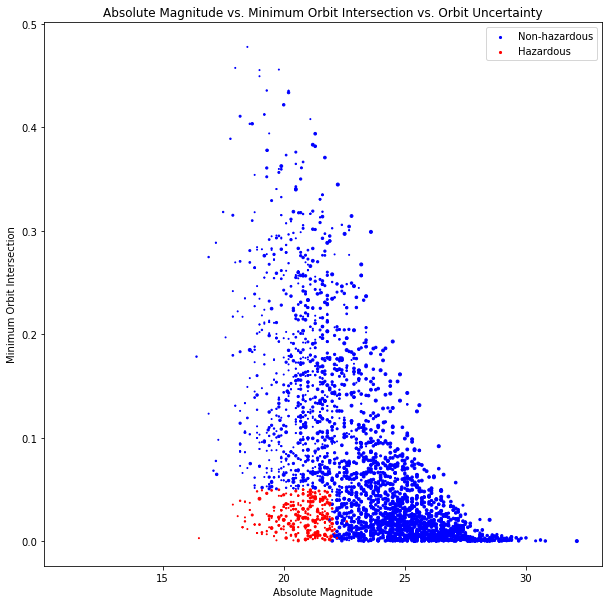

In [8]:
c = df.groupby('Hazardous')
a = c.get_group(0) # non-hazardous
b = c.get_group(1) # hazardous

plt.scatter(a['Absolute Magnitude'],a['Minimum Orbit Intersection'],a['Orbit Uncertainity'],c='b',label='Non-hazardous')
plt.scatter(b['Absolute Magnitude'],b['Minimum Orbit Intersection'],b['Orbit Uncertainity'],c='r',label='Hazardous')
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.xlabel('Absolute Magnitude')
plt.ylabel('Minimum Orbit Intersection')
plt.title('Absolute Magnitude vs. Minimum Orbit Intersection vs. Orbit Uncertainty')
plt.legend()
plt.show()

###### From the above plot, it can be seen that an asteroid is classified as hazardous when its Absolute Magnitude is roughly between 15 and 23 and Minimum Orbit Intersection is approximately between 0 and 0.05

In [9]:
# find count of null values, if any
df.isnull().sum()

Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

##### Observation: There are no null values in this dataset, so no need for dropping null columns

#### Exploring correlation between features 

In [10]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

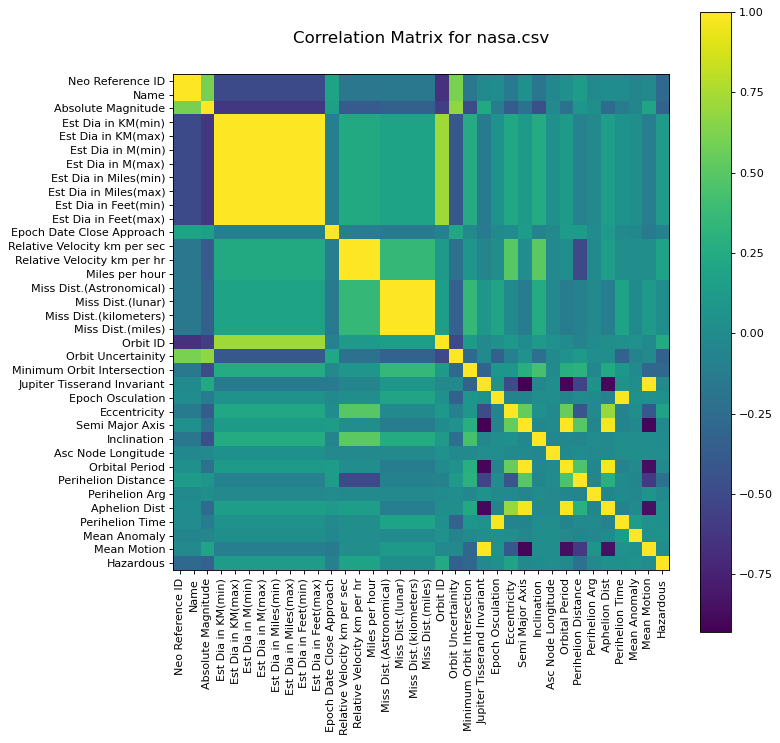

In [11]:
# plot all correlations
plotCorrelationMatrix(df,10)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
Neo Reference ID                4687 non-null int64
Name                            4687 non-null int64
Absolute Magnitude              4687 non-null float64
Est Dia in KM(min)              4687 non-null float64
Est Dia in KM(max)              4687 non-null float64
Est Dia in M(min)               4687 non-null float64
Est Dia in M(max)               4687 non-null float64
Est Dia in Miles(min)           4687 non-null float64
Est Dia in Miles(max)           4687 non-null float64
Est Dia in Feet(min)            4687 non-null float64
Est Dia in Feet(max)            4687 non-null float64
Close Approach Date             4687 non-null object
Epoch Date Close Approach       4687 non-null int64
Relative Velocity km per sec    4687 non-null float64
Relative Velocity km per hr     4687 non-null float64
Miles per hour                  4687 non-null float64
Miss Dist.(Astronomical)        4687

Observation: The dataset has 40 features but some of them describe the same feature but in different standards. These attributes are:
- Est Dia (in various measures)
- Close Approach Date and Epoch Date Close Approach
- Relative Velocity (in various measures)
- Miss Dist.(in various measures)

##### There are 5 non-numerical attribute, of which one is a boolean (Hazardous), and the others (Close Approach Date, Orbiting Body,Orbit Determination Date, Equinox) are of type object. We explore these attributes to determine whether they can be used to train the model

In [13]:
df[['Close Approach Date', 'Orbiting Body','Orbit Determination Date', 'Equinox']].head()

,Close Approach Date,Orbiting Body,Orbit Determination Date,Equinox
0,1995-01-01,Earth,2017-04-06 08:36:37,J2000
1,1995-01-01,Earth,2017-04-06 08:32:49,J2000
2,1995-01-08,Earth,2017-04-06 09:20:19,J2000
3,1995-01-15,Earth,2017-04-06 09:15:49,J2000
4,1995-01-15,Earth,2017-04-06 08:57:58,J2000


##### Close Approach Date and Orbit Determination Date features have dates. We eliminate these as these are not useful for classification model
##### We explore further to find unique values under Orbiting Body and Equinox columns

In [14]:
#unique values
print('Orbiting Body unique values: {}'.format(df['Orbiting Body'].unique()))
print('Equinox unique values: {}'.format(df['Equinox'].unique()))

Orbiting Body unique values: ['Earth']
Equinox unique values: ['J2000']


##### Both the features have just 1 unique value each. Thus, these features cannot be used to train the model either

### Cleaning the dataset to retain only useful features

In [15]:
# find feature set of dataset
df.columns

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous'],
      dtype='object')

In [16]:
# retain only important features
X = df[['Absolute Magnitude', 'Est Dia in Miles(min)', 'Est Dia in Miles(max)', 'Epoch Date Close Approach', 'Relative Velocity km per hr',
        'Miles per hour','Miss Dist.(miles)','Orbit Uncertainity','Minimum Orbit Intersection','Jupiter Tisserand Invariant',
        'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination','Asc Node Longitude', 'Orbital Period',
        'Perihelion Distance','Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly','Mean Motion']]
print('The dataset now has the following {} columns: {}'.format(len(X.columns),X.columns))

The dataset now has the following 22 columns: Index(['Absolute Magnitude', 'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Epoch Date Close Approach', 'Relative Velocity km per hr',
       'Miles per hour', 'Miss Dist.(miles)', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion'],
      dtype='object')


In [17]:
# separating Hazardous feature from rest of the dataset
Y = df['Hazardous'].values

### Normalizing features

In [18]:
# normalization of features
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
print(X[:5])

[[-0.23104209 -0.20941058 -0.20941058 -1.97308738 -1.07713904 -1.07713904
   1.11607503  0.48182219 -0.63171955 -0.34104856  0.3009042   0.23821558
   0.01287488 -0.67195451  1.37719066 -0.07004915 -0.02117222 -1.22388641
   0.01957056  0.45919023  0.77839321 -0.43110028]
 [-0.33482448 -0.15840557 -0.15840557 -1.97308738  0.56814611  0.56814611
   0.8659215  -0.167955    1.15865026  0.3239018   0.3009042  -0.17123418
  -0.5580782   1.37531503 -0.3431925  -0.56539287 -0.39326705  1.24789699
  -0.51480172  0.07081791 -0.06909298  0.31258164]
 [-0.68076581  0.07278876  0.07278876 -1.97003488 -0.8748918  -0.8748918
  -1.41184277 -1.14262078 -0.43484356 -0.40326142  0.3009042  -0.19022296
   0.11173524 -0.83546712  0.84557267  0.02156329  0.56772222  0.62301108
  -0.02132314  0.41557933  1.03940428 -0.52211437]
 [ 1.77541761 -0.52986397 -0.52986397 -1.96698238 -0.38353896 -0.38353896
   0.19579953  0.80671079 -0.85068096  0.02980468  0.3009042  -0.92000153
  -0.27544605 -0.50003839 -1.11347

### Splitting dataset into train and test sets
We split the dataset into train and test sets in 70% - 30% proportion

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.3)
print ('Train set: {} entries'.format(X_train.shape[0]))
print ('Test set: {} entries'.format(X_test.shape[0]))

Train set: 3280 entries
Test set: 1407 entries


### Training the KNN model

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
# initially training model for K=3
neighbors = KNeighborsClassifier(n_neighbors=3).fit(X_train, Y_train)
neighbors

KNeighborsClassifier(n_neighbors=3)

In [21]:
# predict for test set
Y_hat = neighbors.predict(X_test)

In [22]:
# evaluate accuracy of model
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, neighbors.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, Y_hat))

Train set Accuracy:  0.9484756097560976
Test set Accuracy:  0.8763326226012793


In [23]:
# evaluating precision, recall, f1-score, support
from sklearn.metrics import classification_report
target_names = ['Non-Hazardous','Hazardous']
print(classification_report(Y_test, Y_hat, target_names=target_names))

               precision    recall  f1-score   support

Non-Hazardous       0.91      0.94      0.93      1170
    Hazardous       0.66      0.55      0.60       237

     accuracy                           0.88      1407
    macro avg       0.79      0.75      0.76      1407
 weighted avg       0.87      0.88      0.87      1407



### Determining optimal value of K

In [24]:
Ks = 21
test_acc = np.zeros((Ks-1))
train_acc = np.zeros((Ks-1))
ConfustionMx = [];

for n in range(1,Ks):
    #Train Model and Predict  
    neighbors = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    Y_hat=neighbors.predict(X_test)
    test_acc[n-1] = metrics.accuracy_score(Y_test, Y_hat)
    train_acc[n-1] = metrics.accuracy_score(Y_train, neighbors.predict(X_train))
print(test_acc)

[0.88770434 0.8692253  0.87633262 0.87277896 0.88415068 0.87704335
 0.88841507 0.87775409 0.89054726 0.87633262 0.89196873 0.88201848
 0.88770434 0.88059701 0.88557214 0.87988628 0.88770434 0.88557214
 0.89054726 0.88201848]


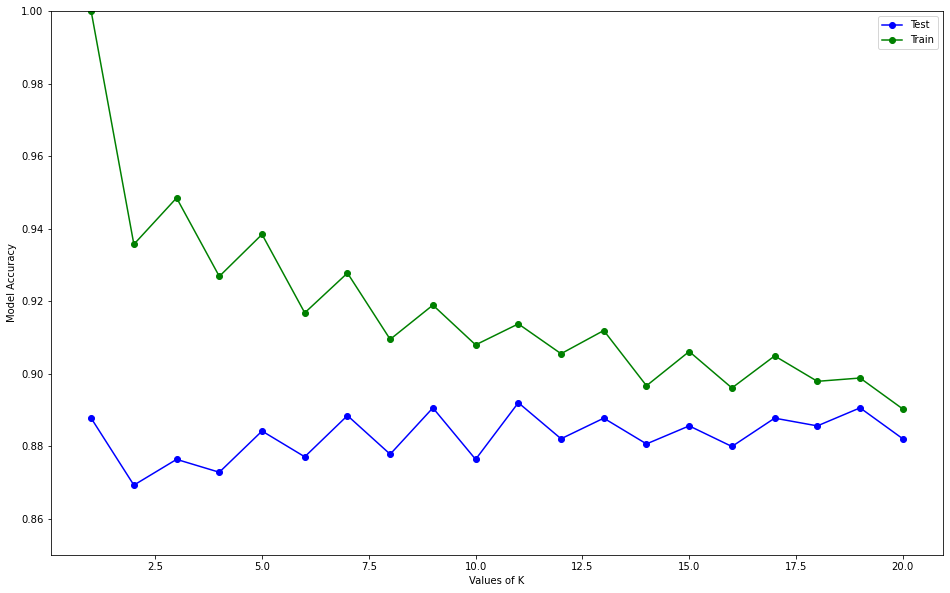

In [25]:
plt.plot([i for i in range(1,Ks)],test_acc,'bo',linestyle='solid',label='Test')
plt.plot([i for i in range(1,Ks)],train_acc,'go',linestyle='solid',label='Train')
plt.ylim(0.85,1)
plt.xlabel('Values of K')
plt.ylabel('Model Accuracy')
fig = plt.gcf()
fig.set_size_inches(16, 10)
plt.legend()
plt.show()

In [26]:
print( "The best accuracy of", test_acc.max(), "was measured with k=", test_acc.argmax()+1) 

The best accuracy of 0.8919687277896233 was measured with k= 11


In [27]:
# K=optimal value
neighbors = KNeighborsClassifier(n_neighbors=test_acc.argmax()+1).fit(X_train, Y_train)
Y_hat = neighbors.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, neighbors.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, Y_hat))
target_names = ['Non-Hazardous','Hazardous']
print(classification_report(Y_test, Y_hat, target_names=target_names))

Train set Accuracy:  0.9137195121951219
Test set Accuracy:  0.8919687277896233
               precision    recall  f1-score   support

Non-Hazardous       0.90      0.98      0.94      1170
    Hazardous       0.82      0.46      0.59       237

     accuracy                           0.89      1407
    macro avg       0.86      0.72      0.76      1407
 weighted avg       0.89      0.89      0.88      1407



# Conclusion
1. The NASA Asteroids dataset was explored and different features were analyzed
2. Few significant features were found to have a strong correlation with the **target feature, 'Hazardous'**. These were further analyzed and plotted to visualize their effect on hazardous asteroid classification
3. It was found that, as per NASA's CNEOS (https://cneos.jpl.nasa.gov/about/neo_groups.html), **"...all asteroids with an Earth Minimum Orbit Intersection Distance (MOID) of 0.05 au or less and an absolute magnitude (H) of 22.0 or less are considered Potentially Hazardous Asteroids."** Thus, the observations made in this project correspond to the official NASA definition for hazardous asteroids
4. The dataset was further cleaned to retain only the features important for classification, split into train and test datasets and used to train and test the KNN classification model. Initially, the accuracy scores and classification report was generated for a K value of 3. It turned out be approximately 88% accurate.
5. Further, the optimal value of K was determined by testing a range of values (from 1 to 20) of K and comparing their accuracies. The train and test accuracies were plotted
6. The value of K that gave the maximum accuracy was considered the best K value for the dataset. The classification report and model accuracy was generated for optimal K value. 
7. Approximately, a 90% accurate model was generated for classification of hazardous and non-hazardous asteroids from the NASA Asteroids dataset using K-Nearest Neighbours Algorithm.